# 1. Estudio y limpieza del DataSet

Este Jupiter Notebook sirve como primer contacto con el conjunto de datos a usar. Por ello, su objetivo principal es entender qué datos tenemos, de qué tipo son y qué anomalias pueden presentar inicialmente. 

## Importación de librerias y DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tx_data = pd.read_excel("OnlineRetail.xlsx", sheet_name="Online Retail")
tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Variables en DataSet

### Tamaño inicial del DataSet

In [3]:
tx_data.shape

(541909, 8)

### Varibales Presentes

In [4]:
tx_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### Celdas a null en dataset

In [5]:
tx_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Estadísticas descriptivas de las variables numéricas 

In [6]:
tx_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf95a2bad0>,
      dtype=object)

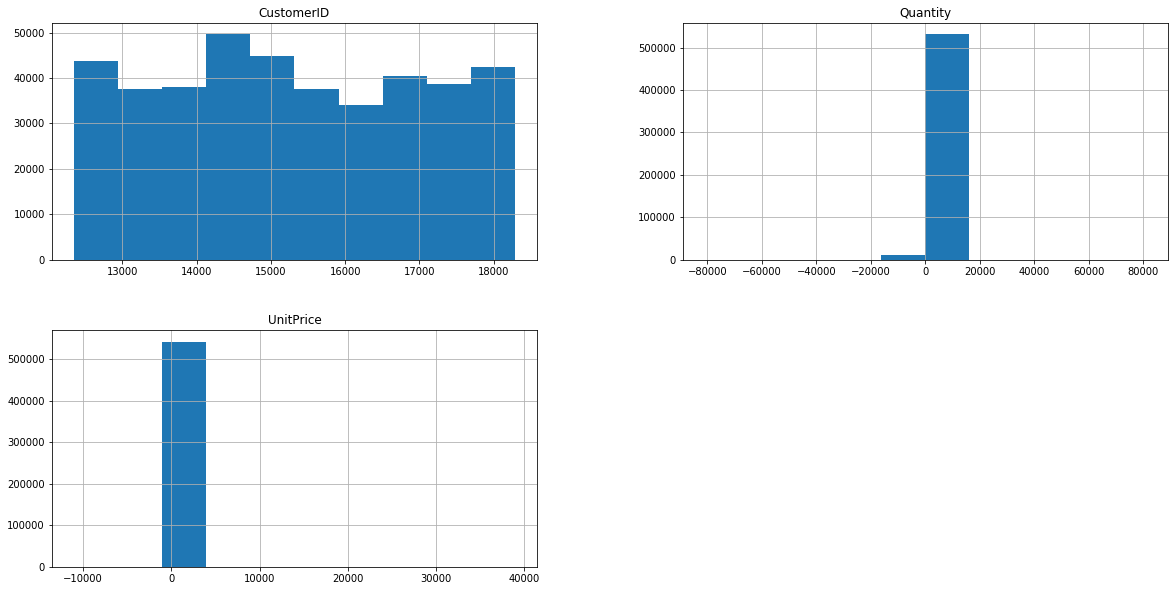

In [7]:
tx_data.hist(figsize=(20,10))
#plt.show()

## Análisis de cada variable

### InvoiceNo

In [8]:
print("Nº de NULLs:", tx_data['InvoiceNo'].isnull().sum())
print("Nº de NAN:", tx_data['InvoiceNo'].isna().sum())
print("Nº UNIQUE Values:", tx_data['InvoiceNo'].unique().size)
#tx_data['InvoiceNo'].describe()

Nº de NULLs: 0
Nº de NAN: 0
Nº UNIQUE Values: 25900


### StockCode

In [9]:
print("Nº de NULLs:", tx_data['StockCode'].isnull().sum())
print("Nº UNIQUE Values:", tx_data['StockCode'].unique().size)
tx_data['StockCode'].describe()

Nº de NULLs: 0
Nº UNIQUE Values: 4070


count     541909
unique      4070
top       85123A
freq        2313
Name: StockCode, dtype: object

### Description

In [10]:
print("Nº de NULLs:", tx_data['Description'].isnull().sum())
print("Nº UNIQUE Values:", tx_data['Description'].unique().size)
tx_data['Description'].describe()

Nº de NULLs: 1454
Nº UNIQUE Values: 4224


count                                 540455
unique                                  4223
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2369
Name: Description, dtype: object

### Quantity

In [11]:
print("Nº de NULLs:", tx_data['Quantity'].isnull().sum())
print("Nº UNIQUE Values:", tx_data['Quantity'].unique().size)
tx_data['Quantity'].describe()

Nº de NULLs: 0
Nº UNIQUE Values: 722


count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [12]:
Quantity_max = tx_data.Quantity.max()
Quantity_min = tx_data.Quantity.min()
str_ = "Quantity(max= " + str(Quantity_max) + ", min= " + str(Quantity_min)+ ")"
print(str_ )

Quantity(max= 80995, min= -80995)


In [13]:
tx_aux = tx_data[tx_data.Quantity < 0]
tx_aux.sort_values(by=['UnitPrice'],ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,NaN,United Kingdom
446533,C574902,AMAZONFEE,AMAZON FEE,-1,2011-11-07 15:21:00,8286.22,NaN,United Kingdom
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom


***Observaciones***


1. Description = AMAZON FEE ( Tarifa de Amazon) ->  CustomerID NaN
2. Description = Postage (Gastos de envio) (StockCode = POST)
3. Description = Manual (StockCode = M)
4. Description = Discount (StockCode = D)
5. Description = damages or damages wax -> siempre UnitPrice 0 y CustomerId NaN
6. Description = check -> siempre UnitPrice 0 y CustomerId NaN
7. Description = NaN -> siempre UnitPrice 0 y CustomerId NaN

Descartaremos todos las tranasciones con UnitPrice 0 y/o CusotmerID NaN puesto que en el análisis que deseamos llevar a cabo queremos evaluar rentabilidad medida en $ y el valor de los clientes (por lo que si no podemos identifiacar un gasto a un cliente no tiene sentido que tengamos en cuenta dicha transacción)

***Nota***: Las tranasaciones cuyo InvoiceNo comienza por "C" indican una cancelación, y por tanto son eliminadas en estudio a realizar. 

### InvoiceDate

In [14]:
print("Nº de NULLs:", tx_data['InvoiceDate'].isnull().sum())
print("Nº UNIQUE Values:", tx_data['InvoiceDate'].unique().size)
tx_data['InvoiceDate'].describe()

Nº de NULLs: 0
Nº UNIQUE Values: 23260


count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

### CustomerID

In [15]:
print("Nº de NULLs:", tx_data['CustomerID'].isnull().sum())
print("Nº UNIQUE Values:", tx_data['CustomerID'].unique().size)
tx_data['CustomerID'].describe()

Nº de NULLs: 135080
Nº UNIQUE Values: 4373


count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [16]:
tx_data[tx_data.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


***Observaciones***

Las transacciones no asociadas a un CustomerID serán eliminadas para el estudio y predicción del valor de un cliente para el negocio, conocido como LifeTimeValue.

### Country

In [17]:
print("Nº de NULLs:", tx_data['Country'].isnull().sum())
print("Nº UNIQUE Values:", tx_data['Country'].unique().size)
tx_data['Country'].describe()

Nº de NULLs: 0
Nº UNIQUE Values: 38


count             541909
unique                38
top       United Kingdom
freq              495478
Name: Country, dtype: object

In [18]:
tx_data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

***Observaciones***

Observamos 38 paises en los que opera el E-commerce

## UnitPrice

In [19]:
unitPrice_max = tx_data.UnitPrice.max()
unitPrice_min = tx_data.UnitPrice.min()
str_ = "unitPrice(max= " + str(unitPrice_max) + ", min= " + str(unitPrice_min)+ ")"


print("Nº de NULLs:", tx_data['UnitPrice'].isnull().sum())
print("Nº UNIQUE Values:", tx_data['UnitPrice'].unique().size)
print(str_ )
tx_data['UnitPrice'].describe()

Nº de NULLs: 0
Nº UNIQUE Values: 1630
unitPrice(max= 38970.0, min= -11062.06)


count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [20]:
unitPrice_max = tx_data.UnitPrice.max()
unitPrice_min = tx_data.UnitPrice.min()
str_ = "unitPrice(max= " + str(unitPrice_max) + ", min= " + str(unitPrice_min)+ ")"
print(str_ )

unitPrice(max= 38970.0, min= -11062.06)


In [21]:
tx_aux = tx_data[tx_data.UnitPrice < 0]
tx_aux.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


***Observaciones***

Eliminamos las transacciones con UnitPrice negativo que como observamos en arriba sólo son dos. Se trata de un ajuste de deudas incobrables.  